In [ ]:
install.packages("psych")
install.packages("car")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘mnormt’, ‘GPArotation’




In [ ]:
library(psych)
library(car)
library(MASS)
require(foreign)

Loading required package: foreign



In [ ]:
#Đọc dữ liệu và ghi ra một số dữ liệu ở đầu
data <- read.csv("marketing.csv")
head(data)

,index,Television,Socia_Network,newspaper,Turnover
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,200.92,142.17,145.41,943.0419
2,2,156.26,129.85,62.70,856.2597
3,3,124.38,187.57,140.04,964.9689
4,4,157.69,187.48,143.94,1017.4412
5,5,158.23,222.41,116.04,1115.2990
6,6,132.48,181.55,119.84,932.3739


In [ ]:
dim(data)
#Bộ dữ liệu gồm 200 quan sát

[1] 200   5

In [ ]:
#Gán các biến trong bảng cho tiện sử dụng sau này
Television <- data$Television
Social <- data$Socia_Network
News <- data$newspaper
Turnover <- data$Turnover

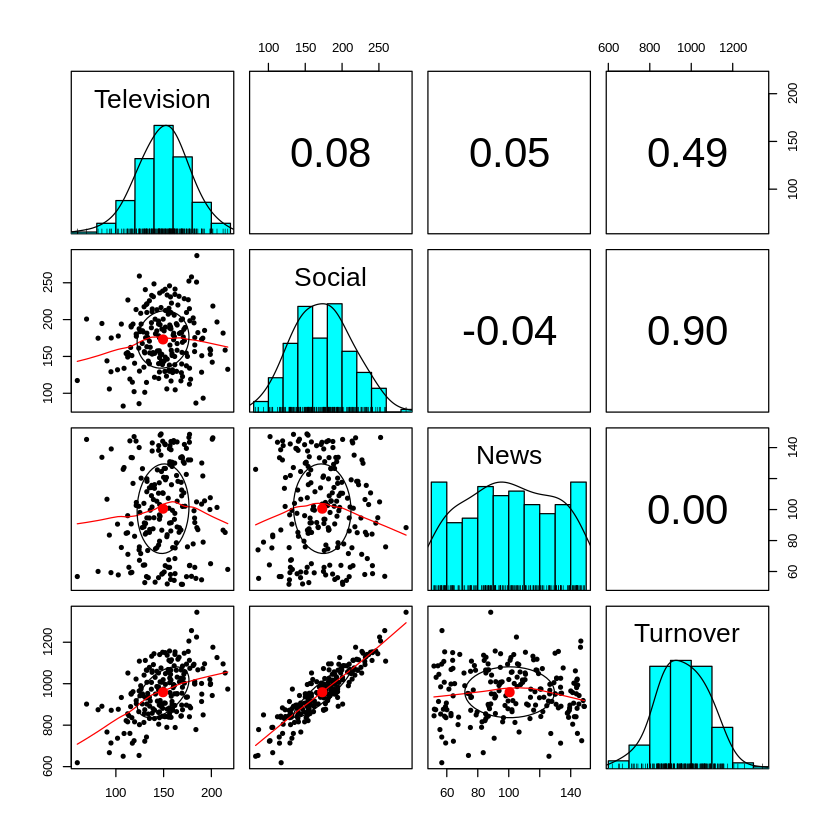

In [ ]:
#Xem tương quan giữa các biến
vars <- cbind(Television, Social, News, Turnover)
pairs.panels(vars)

In [ ]:
#Ta có thể thấy tương quan giữa biến Social và Turnover là khá cao, cụ thể là 0.9 nên tạm thời bỏ qua hai biến là Televion và News
cor(Social,Turnover)

[1] 0.9030928

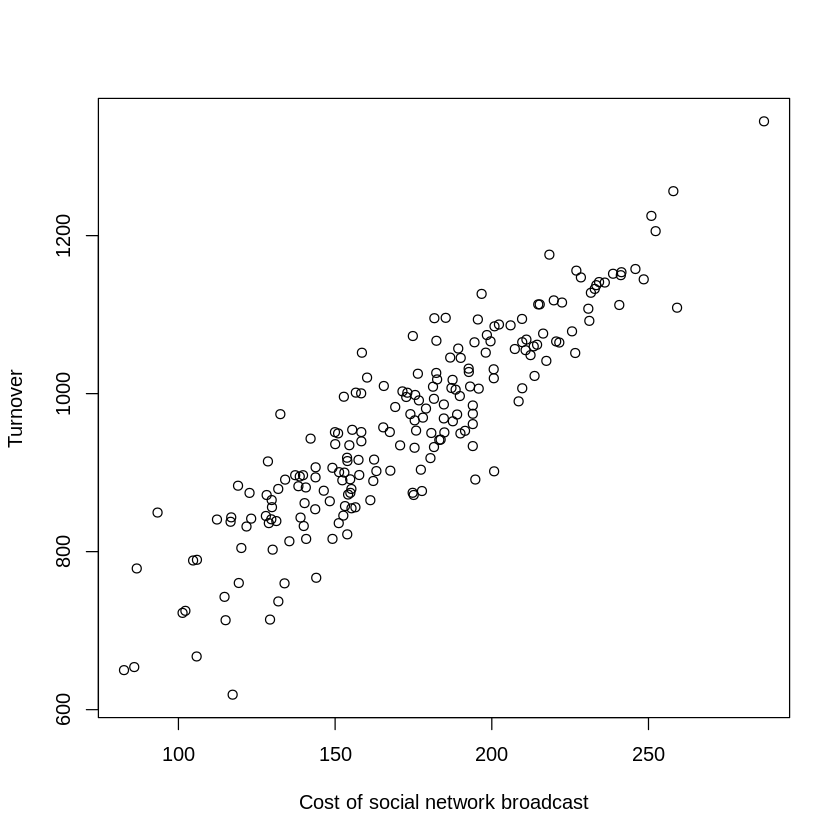

In [ ]:
#Vẽ biểu đồ giữa hai biến Social (trục x) và Turnover (trục y)
#Ta thấy mối quan hệ là tuyến tính
plot(Social, Turnover, xlab = "Cost of social network broadcast", ylab = "Turnover")

In [ ]:
#Chạy mô hình hồi quy OLS
fit_1<- lm(Turnover ~ Social, data = data)
summary(fit_1)


Call:
lm(formula = Turnover ~ Social, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-181.504  -32.874    2.386   34.283  134.180 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 467.45415   17.01935   27.47   <2e-16 ***
Social        2.83909    0.09594   29.59   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 52.82 on 198 degrees of freedom
Multiple R-squared:  0.8156,	Adjusted R-squared:  0.8146 
F-statistic: 875.6 on 1 and 198 DF,  p-value: < 2.2e-16


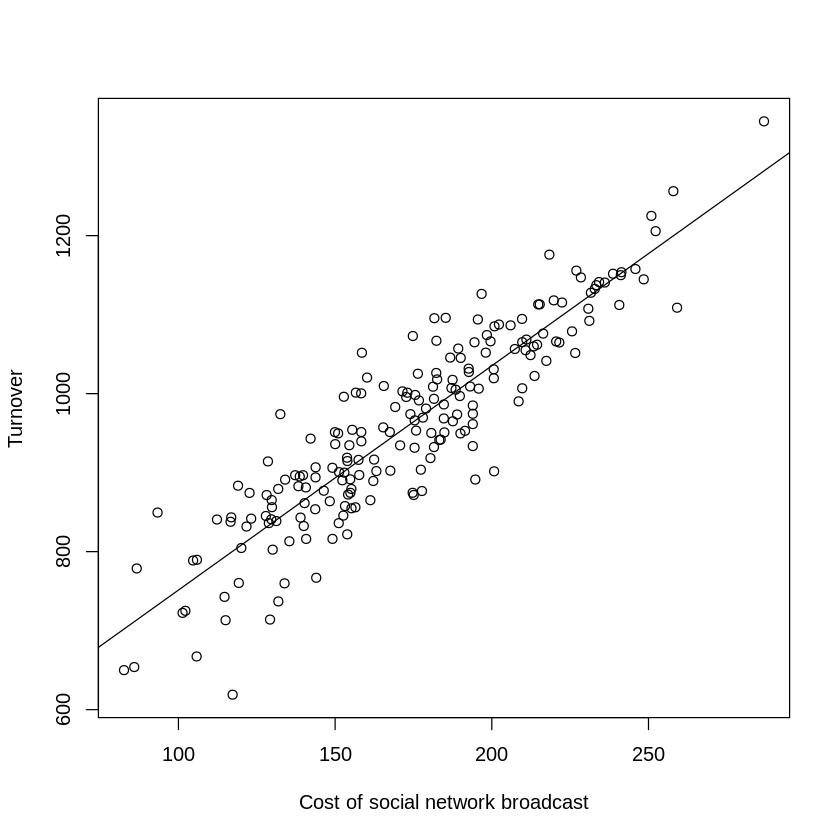

In [ ]:
#Vẽ thêm phương trình đường thẳng
plot(Social, Turnover, xlab = "Cost of social network broadcast", ylab = "Turnover")
abline(fit_1)

In [ ]:
#Diễn giải mô hình fit_1:
#Ta thấy hệ số góc dương nên biến Social và Turnover tỉ lệ thuận với nhau, chi phí quảng bá trên mạng xã hội càng cao thì dẫn tới càng tăng doanh thu
#p-value của biến Social < 0.05 nên biến này có ý nghĩa thống kê
#R-squared = 0.8156 cho thấy rằng 81.56% dữ liệu có thể được giải thích
#p-value của F-statistic < 0.05 cho thấy mô hình có cả hai hệ số chặn và góc hiệu quả hơn

In [ ]:
#Ta cần kiểm định 4 tiêu chí sau:
#1.Kiểm định về tính tuyến tính => Với tiêu chí này ta có thể thấy rõ đã thỏa mãn thông qua biểu đồ bên trên
#2.Phần dư có phân phối chuẩn => chạy shapiro test ta có p-value > 0.05, ta chấp nhận giả thuyết H0 tức phần dư có phân phối chuẩn
#3.Phần dư có trung bình bằng 0 => ta thấy phần dư xấp xỉ 0
#4.Phương sai của phần dư là không đổi => chạy ncvTest có p-value =  0.0092782 < 0.05 => Phương sai của phần dư có thay đổi

In [ ]:
 #Gán phần dư vào biến res
res <- residuals(fit)


	Shapiro-Wilk normality test

data:  res
W = 0.99372, p-value = 0.5592


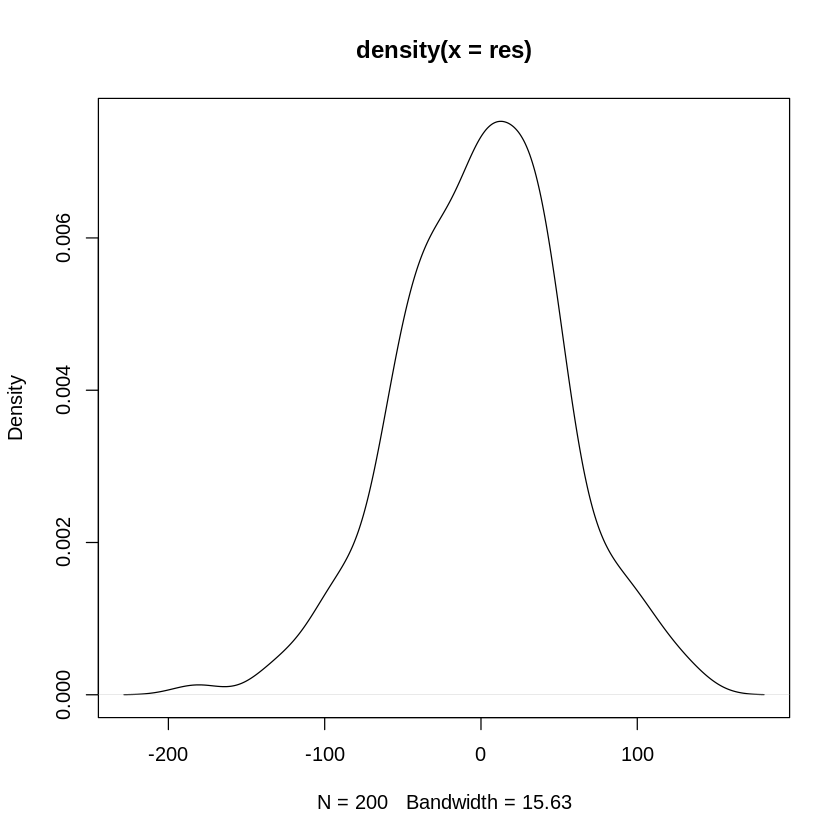

In [ ]:
#Tiêu chí 2
shapiro.test(res) #chạy shapiro test để kiểm định phân phối chuẩn
plot(density(res))

In [ ]:
#Tiêu chí 3
mean(res) #tính trung bình của phần dư
t.test(res, mu = 0) #chạy t.test

[1] 2.953998e-16


	One Sample t-test

data:  res
t = 7.9297e-17, df = 199, p-value = 1
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -7.346033  7.346033
sample estimates:
   mean of x 
2.953998e-16 


In [ ]:
#Tiêu chí 4
ncvTest(fit_1)

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 6.768474, Df = 1, p = 0.0092782

In [ ]:
#Chạy mô hình hồi quy đa biến để xét của tác động của ba biến lên doanh thu
fit_2 <- lm(Turnover ~ Television + News + Social,data = data)
summary(fit_2)


Call:
lm(formula = Turnover ~ Television + News + Social, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-37.571  -9.826   0.581   9.575  40.175 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 202.19448    7.93632  25.477   <2e-16 ***
Television    1.86693    0.03832  48.714   <2e-16 ***
News          0.04969    0.03590   1.384    0.168    
Social        2.73133    0.02668 102.382   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 14.62 on 196 degrees of freedom
Multiple R-squared:  0.986,	Adjusted R-squared:  0.9858 
F-statistic:  4605 on 3 and 196 DF,  p-value: < 2.2e-16


In [ ]:
#Diễn giải mô hình fit_2:
#Trung vị của sai số = 0.581 ~ 0
#Hai biến Television và Social có p-value < 0.05 nên có ý nghĩa thống kê, biến News không có ý nghĩa thống kê
#98.6% dữ liệu có thể diễn giải thông qua mô hình
#F-statistic về mặt tổng quan thì mô hình gồm 3 biến là có ý nghĩa thống kê, nhưng thực chất chỉ có 2 biến có ý nghĩa thống kê

In [ ]:
#Tiến hành loại bỏ biến News không có ý nghĩa thống kê ra khỏi mô hình
fit_3 <- lm(Turnover ~ Television  + Social, data = data)
summary(fit_3)


Call:
lm(formula = Turnover ~ Television + Social, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-38.589  -9.631   0.468   9.658  38.351 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 207.06397    7.13046   29.04   <2e-16 ***
Television    1.86966    0.03836   48.74   <2e-16 ***
Social        2.72971    0.02671  102.18   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 14.65 on 197 degrees of freedom
Multiple R-squared:  0.9859,	Adjusted R-squared:  0.9857 
F-statistic:  6875 on 2 and 197 DF,  p-value: < 2.2e-16


In [ ]:
#Kiểm tra xem có xảy ra hiện tượng cộng tuyến hay không
vif(fit_3)
#Ta thấy không có biến nào có giá trị lớn hơn 5 nên không xảy ra hiện tượng cộng tuyến

Television     Social 
  1.007108   1.007108